In [313]:
import pandas as pd
import matplotlib.pyplot as plt

In [314]:
color_palette = {
    'region': ['Region Berner-Mitelland', 'Region Berner-Oberland', 'Region Freiburg-Neuenburg-Jura', 'Region Graubuenden', 'Region Nordwestschweiz', 'Region Ostschweiz', 'Region Tessin', 'Region Waadt-Genfersee', 'Region Wallis', 'Region Zentralschweiz', 'Region Zuerich'],
    'color': ['#5188AD', '#E9D797', '#CAA2C0' , '#8B76B4', '#EEA760', '#E26D64', '#B65278', '#A6CAEC', '#619589', '#AC9186', '#809668']
}


# Daten camping.ch
### Import

In [315]:
df_camping = pd.read_csv('campingspider/camping.csv', encoding='utf-8')
df_camping

,URL,Name,Ortschaft,Website,Sternebewertung,Aktivitäten,Touristenstellplätze,open (seasons 1),open (seasons 2),open (seasons 3),...,Trockner,Wandern,See mit Kies- oder Sandstrand,See mit Steinstrand,Fluss,Bahnhof,Busstation,VSC membership,TCS membership,SCCV membership
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,1,1,0,0,0,1,0,1,0,1
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,NaN,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,1,1,0,0,0,0,1,1,0,0
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,1,1,1,1,0,0
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,1,1,0,1,1,1,1,1,0,0
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,0,0,1,1,1,1,0,0
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,1,1,0,1,1,1,1,1,0,0
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,1,0,0,1,0,1,1,1,0


### Ersetzen von falschen Stellplatz-Werten

In [316]:
# welche Campingplätze, haben weniger als 11 Touristenstellplätze angegeben?
filtered_touristp_df = df_camping[df_camping['Touristenstellplätze'].isna() | (df_camping['Touristenstellplätze'] < 11)]
filtered_touristp_df[['URL', 'Touristenstellplätze']]

,URL,Touristenstellplätze
1,https://camping.ch/de/campingplatz/ostschweiz/...,NaN
14,https://camping.ch/de/campingplatz/ostschweiz/...,3.0
15,https://camping.ch/de/campingplatz/wallis/semb...,0.0
19,https://camping.ch/de/campingplatz/berner-ober...,7.0
46,https://camping.ch/de/campingplatz/zentralschw...,8.0
47,https://camping.ch/de/campingplatz/zentralschw...,10.0
49,https://camping.ch/de/campingplatz/waadt-genfe...,NaN
63,https://camping.ch/de/campingplatz/zentralschw...,NaN
90,https://camping.ch/de/campingplatz/tessin/mont...,NaN
100,https://camping.ch/de/campingplatz/freiburg-ne...,9.0


In [317]:
# Es wurden die Campingplätze mit Anzahl Touristenplätze < 11 und 'nan' geprüft.
# Quelle: Internetseite der Campingplätze.
corrections_pitches = {
    'https://camping.ch/de/campingplatz/ostschweiz/weesen/camping-gaesi?l=true': 70,
    'https://camping.ch/de/campingplatz/waadt-genfersee/forel/camping-de-forel?l=true': 43,
    'https://camping.ch/de/campingplatz/ostschweiz/Altst%25C3%25A4tten/allmend_rheintal?l=true': 150,
    'https://camping.ch/de/campingplatz/wallis/ritzingen/camping-brigga?l=true': 127,
    'https://camping.ch/de/campingplatz/ostschweiz/mammern/seewiese?l=true': 95,
    'https://camping.ch/de/campingplatz/zentralschweiz/seelisberg/naturcamping_seelisberg?l=true': 60,
    'https://camping.ch/de/campingplatz/tessin/monteggio/boscodellabella?l=true': 10,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-noirmont/camping-du-creux-des-biches?l=true': 40,
    'https://camping.ch/de/campingplatz/zentralschweiz/sisikon/camping_bucheli?l=true': 50,
    'https://camping.ch/de/campingplatz/wallis/sembrancher/la-prairie?l=true': 48,
    'https://camping.ch/de/campingplatz/berner-mitelland/rueschegg-heubach/camping-rueschegg-heubach?l=true': 20,
    'https://camping.ch/de/campingplatz/zentralschweiz/morgarten/camping_neselen?l=true': 40,
    'https://camping.ch/de/campingplatz/berner-oberland/boenigen/seeruhe?l=true': 88,
    'https://camping.ch/de/campingplatz/ostschweiz/stein-a-rhein/grenzstein?l=true': 64,
    'https://camping.ch/de/campingplatz/berner-oberland/saanen/beim-kappeli?l=true': 27,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/rebeuvilier/du-raimeux?l=true': 31,
    'https://camping.ch/de/campingplatz/berner-oberland/gsteig-b-gstaad/bergcamping-gsteig?l=true': 16,
    'https://camping.ch/de/campingplatz/berner-oberland/schwenden-im-diemtigtal/camping-eggmatte-diemtigtal?l=true': 16,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-landeron/bellerive-le-landeron?l=true': 50,
}

# Funktion zur Korrektur der Anzahl Touristenplätze
def correct_dates(row):
    if row['URL'] in corrections_pitches:
        return corrections_pitches[row['URL']]
    return row['Touristenstellplätze']

# Anzahl Touristenplätze im DataFrame korrigieren
df_camping['Touristenstellplätze'] = df_camping.apply(correct_dates, axis=1)

### Ersetzen von falschen Datums-Werten

In [318]:
# Folgende drei Saisondaten waren mit null Tagen hinterlegt und wurden deshalb manuell nachgeschaut. Die restlichen Saisondaten wurden nicht nachgeprüft.
corrections_date = {
    'Camping Bellavista': '12.04.2024 - 13.10.2024',
    'Camping Schaffhausen - Freizeitanlage Rheinwiese': '27.03.2024 - 20.10.2024',
    'Nufenenpark': '01.06.2024 - 30.09.2024'
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['Name'] in corrections_date:
        return corrections_date[row['Name']]
    return row['open (seasons 1)']

# Datumsangaben im DataFrame korrigieren
df_camping['open (seasons 1)'] = df_camping.apply(correct_dates, axis=1)

### Berechnung prozentuale Öffnungszeiten
Tage Jahr: 365 (Vereinfachung)

In [319]:
from datetime import datetime
# Tage von Öffnung bis Schliessung der Saison
def process_column_value(value):
    # leere Zellen:
    if pd.isna(value) or value == "":
        return 0
    try:
        # wenn ein Text vor dem Datum steht, sollen die Zeichen nach dem Doppelpunkt für das Datum verwendet werden
        if ':' in value:
            middle_value = value[value.find(':') + 2: value.find(':') + 12].strip()
            open_date = datetime.strptime(middle_value, '%d.%m.%Y')
            end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
            return  (end_date - open_date).days
        end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
        open_date = datetime.strptime(value[:10].strip(), '%d.%m.%Y')
        return (end_date - open_date).days
    except:
        print(f"Fehler bei der Verarbeitung von Wert {value}")
        return 0

# für alle Saison die Tage berechnen (falls mehrere) und zusammenzählen
def calculate_row(row):
    columns = ['open (seasons 1)', 'open (seasons 2)', 'open (seasons 3)', 'open (seasons 4)', 'open (seasons 5)', 'open (seasons 6)', 'open (seasons 7)']
    total = 0
    for col in columns:
        total += process_column_value(row[col])
    return total

# Neue Spalte mit Tagen erstellen, indem die Berechnung auf jede Zeile angewandt wird
df_camping['Öffnungszeit[Tage]'] = df_camping.apply(calculate_row, axis=1)

In [320]:
# prozentualer Anteil der offenen Tage am Gesamtjahr
df_camping['Öffnungszeit[%]'] = df_camping['Öffnungszeit[Tage]'].apply(lambda x: round(x / 365,2) if x <= 365 else 365/365)

In [321]:
df_camping

,URL,Name,Ortschaft,Website,Sternebewertung,Aktivitäten,Touristenstellplätze,open (seasons 1),open (seasons 2),open (seasons 3),...,See mit Kies- oder Sandstrand,See mit Steinstrand,Fluss,Bahnhof,Busstation,VSC membership,TCS membership,SCCV membership,Öffnungszeit[Tage],Öffnungszeit[%]
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,0,1,0,1,0,1,213,0.58
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,0,365,1.00
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,1,1,0,0,183,0.50
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,1,1,1,0,0,365,1.00
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,1,0,0,0,153,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,1,0,0,365,1.00
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,1,1,1,0,0,365,1.00
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,0,1,1,1,1,1,0,0,186,0.51
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,0,1,0,1,1,1,0,163,0.45


## Region extrahieren aus 'URL'

In [322]:
# Funktion zum Extrahieren der Region aus der URL
def extract_region(URL):
    parts = URL.split('/')
    if len(parts) > 5:
        return parts[5]  # Das Wort nach dem fünften '/' in der URL
    else:
        return None

# Neue Spalte 'Region' erstellen
df_camping['Region'] = df_camping['URL'].apply(extract_region)


In [323]:
# Region grosschreiben
def capitalize(text):
    parts = text.split('-')
    capitalized_parts = [part.capitalize() for part in parts]
    return '-'.join(capitalized_parts)

df_camping['Region'] = df_camping['Region'].apply(capitalize)
df_camping

,URL,Name,Ortschaft,Website,Sternebewertung,Aktivitäten,Touristenstellplätze,open (seasons 1),open (seasons 2),open (seasons 3),...,See mit Steinstrand,Fluss,Bahnhof,Busstation,VSC membership,TCS membership,SCCV membership,Öffnungszeit[Tage],Öffnungszeit[%],Region
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,1,0,1,0,1,213,0.58,Graubuenden
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,365,1.00,Ostschweiz
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,0,0,1,1,0,0,183,0.50,Freiburg-Neuenburg-Jura
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,0,0,365,1.00,Graubuenden
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,0,1,0,0,0,153,0.42,Wallis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,1,1,1,1,1,0,0,365,1.00,Berner-Oberland
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,1,1,1,1,0,0,365,1.00,Wallis
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,1,1,1,1,1,0,0,186,0.51,Berner-Oberland
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,1,0,1,1,1,0,163,0.45,Tessin


In [324]:
# One hot Encoding
df_region_encoded = pd.get_dummies(df_camping['Region'], prefix='Region', prefix_sep=' ')

# Umwandlung von boolschen Werten in numerische Werte (0 und 1)
df_region_encoded = df_region_encoded.astype(int)
df_region_encoded

,Region Berner-Mitelland,Region Berner-Oberland,Region Freiburg-Neuenburg-Jura,Region Graubuenden,Region Grenznah,Region Nordwestschweiz,Region Ostschweiz,Region Tessin,Region Waadt-Genfersee,Region Wallis,Region Zentralschweiz,Region Zuerich
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,1,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,1,0,0
374,0,1,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,1,0,0,0,0


In [325]:
# die Spalten ausschliessen, welchen nicht in der Schweiz sind
df_region_encoded = df_region_encoded.drop(['Region Grenznah'], axis=1)

In [326]:
df_region_encoded.shape[1]

11

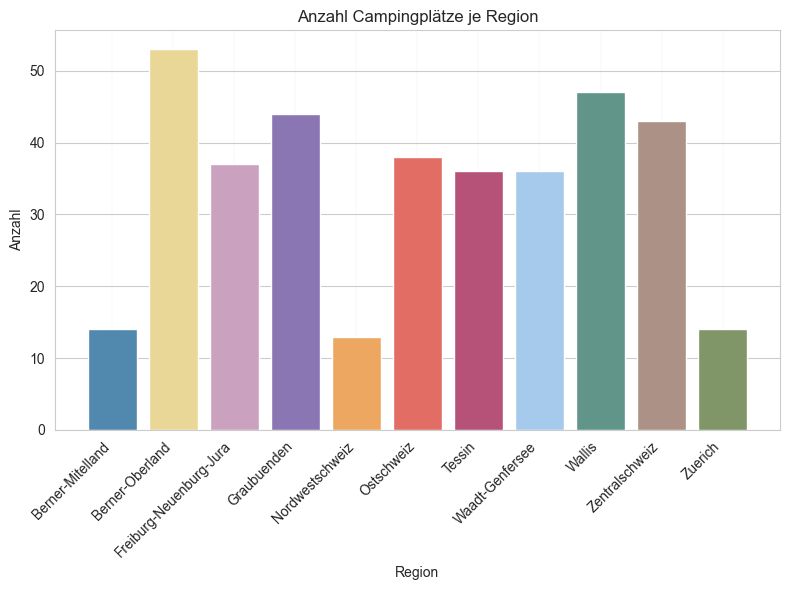

In [327]:
# Gestapeltes Säulendiagramm erstellen
fig, ax = plt.subplots(figsize=(8, 6))

# Anzahl der Zeilen im DataFrame
num_rows = len(df_region_encoded)

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_region_encoded.columns):
    values = df_region_encoded[col].values
    region = col

    # Farbe abrufen
    if region in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(region)]
    else:
        color = '#CCCCCC'

    # Höhe der Säule
    ax.bar(i, sum(values), color=color)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Anzahl')
ax.set_xlabel('Region')
ax.set_title('Anzahl Campingplätze je Region')

xticklabels = [col[7:] for col in df_region_encoded.columns]
ax.set_xticks(range(len(df_region_encoded.columns)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Vertikale Hilfslinien ausschalten
ax.grid(which='major', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Region in Gesamt-DF intgrieren

In [328]:
df_camping = pd.concat([df_camping, df_region_encoded], axis=1)

In [329]:
df_camping

,URL,Name,Ortschaft,Website,Sternebewertung,Aktivitäten,Touristenstellplätze,open (seasons 1),open (seasons 2),open (seasons 3),...,Region Berner-Oberland,Region Freiburg-Neuenburg-Jura,Region Graubuenden,Region Nordwestschweiz,Region Ostschweiz,Region Tessin,Region Waadt-Genfersee,Region Wallis,Region Zentralschweiz,Region Zuerich
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


## Zusammenfassung der Attribute/Faktoren
z.B. Gastronomieangebot ist vorhanden, wenn es entweder ein Restaurant oder ein Take away gibt.

In [330]:
# washing
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['Waschmaschine'] + row['Trockner']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['Waschmaschine und Trockner'] = df_camping.apply(calculate_result, axis=1)

In [331]:
# Restaurants, Bars
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['Restaurant'] + row['Take away']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['Gastronomie'] = df_camping.apply(calculate_result, axis=1)

In [332]:
# Shopping
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['Laden mit einfachem Angebot'] + row['Kiosk'] + row['Einkaufzentrum'] + row['Laden mit reichem Angebot']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['Shop'] = df_camping.apply(calculate_result, axis=1)

In [333]:
# water side
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['See mit Kies- oder Sandstrand'] + row['See mit Steinstrand'] + row['Fluss']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['Strandzugang'] = df_camping.apply(calculate_result, axis=1)

In [334]:
# membership
# Summe aller Mitgliedschaften werden zusammengezählt
def calculate_result(row):
    total = row['VSC membership'] + row['TCS membership'] + row['SCCV membership']
    return total

# Ergebnis in neue Spalte speichern
df_camping['Mitgliedschaften'] = df_camping.apply(calculate_result, axis=1)

In [335]:
df_camping

,URL,Name,Ortschaft,Website,Sternebewertung,Aktivitäten,Touristenstellplätze,open (seasons 1),open (seasons 2),open (seasons 3),...,Region Tessin,Region Waadt-Genfersee,Region Wallis,Region Zentralschweiz,Region Zuerich,Waschmaschine und Trockner,Gastronomie,Shop,Strandzugang,Mitgliedschaften
0,https://camping.ch/de/campingplatz/graubuenden...,Islas,7477 Filisur (GR),www.campingislas.ch,3,3,50.0,01.04.2024 − 31.10.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,0,2
1,https://camping.ch/de/campingplatz/ostschweiz/...,Stellplatz Allmend Rheintal,9450 Altstätten (SG),NaN,0,7,150.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,https://camping.ch/de/campingplatz/freiburg-ne...,Camping de la Forêt,1642 Sorens (FR),NaN,4,4,50.0,15.04.2024 − 15.10.2024,NaN,NaN,...,0,0,0,0,0,1,1,1,0,1
3,https://camping.ch/de/campingplatz/graubuenden...,Sur En / Sent,7554 Sur En / Sent (GR),NaN,4,4,120.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,1,0,0,1,1
4,https://camping.ch/de/campingplatz/wallis/evol...,Evolène,1983 Evolène (VS),NaN,3,1,65.0,15.05.2024 − 15.10.2024,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,https://camping.ch/de/campingplatz/berner-ober...,Alpencamping,3860 Meiringen (BE),www.alpencamping.ch,4,11,34.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,0,0,0,1,1,1,1,1
373,https://camping.ch/de/campingplatz/wallis/fies...,Eggishorn,3984 Fiesch (VS),NaN,4,6,127.0,01.01.2024 − 31.12.2024,NaN,NaN,...,0,0,1,0,0,1,1,1,1,1
374,https://camping.ch/de/campingplatz/berner-ober...,Camping Hobby 3,3800 Unterseen-Interlaken (BE),NaN,4,11,80.0,01.04.2024 − 04.10.2024,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
375,https://camping.ch/de/campingplatz/tessin/meri...,Camping Monte San Giorgio,6866 Meride (TI),NaN,4,8,64.0,19.04.2024 − 29.09.2024,NaN,NaN,...,1,0,0,0,0,1,0,0,1,2


In [336]:
df_camping.dtypes

URL                           object
Name                          object
Ortschaft                     object
Website                       object
Sternebewertung                int64
                               ...  
Waschmaschine und Trockner     int64
Gastronomie                    int64
Shop                           int64
Strandzugang                   int64
Mitgliedschaften               int64
Length: 69, dtype: object

# Manuelle Daten (Preis)
## Import

In [337]:
df_price = pd.read_csv('rohdaten_preis.csv', encoding='utf-8', sep=';')
df_price

,URL,Preisseite,Latitude,Longitude,Stellplatz am Wasser,weiter Unterküfte,kleiner Platz (<80 m2),mittlerer Platz (~100 m2),grosser Platz (>110 m2),Hauptsaison,Nebensaison,Preis
0,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,1,0,0,1,0,38.0
1,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,0,1,0,1,0,43.0
2,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,1,0,0,0,1,40.0
3,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0.0,1.0,0,1,0,0,1,45.0
4,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-st-c...,46.698692,9.558404,0.0,1.0,1,0,0,1,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
826,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0.0,0.0,1,0,0,1,1,31.2
827,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0.0,0.0,0,1,0,1,1,37.2
828,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0.0,0.0,1,0,0,0,1,26.7
829,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0.0,0.0,1,0,0,1,0,28.7


### Leere Zeilen löschen

In [338]:
len(df_price)

831

In [339]:
# alle Zeilen, welche keinen Preis hinterlegt haben, werden gelöscht
df_price = df_price[df_price['Preis'] != 0]

In [340]:
len(df_price)

806

## Format prüfen

In [341]:
df_price.dtypes

URL                            object
Preisseite                     object
Latitude                      float64
Longitude                     float64
Stellplatz am Wasser          float64
weiter Unterküfte             float64
kleiner Platz (<80 m2)          int64
mittlerer Platz  (~100 m2)      int64
grosser Platz (>110 m2)         int64
Hauptsaison                     int64
Nebensaison                     int64
Preis                         float64
dtype: object

In [342]:
df_price['Stellplatz am Wasser'] = df_price['Stellplatz am Wasser'].astype(int)
df_price['weiter Unterküfte'] = df_price['weiter Unterküfte'].astype(int)
df_price.dtypes

C:\Users\sarak\AppData\Local\Temp\ipykernel_17468\441198220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Stellplatz am Wasser'] = df_price['Stellplatz am Wasser'].astype(int)
C:\Users\sarak\AppData\Local\Temp\ipykernel_17468\441198220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['weiter Unterküfte'] = df_price['weiter Unterküfte'].astype(int)


URL                            object
Preisseite                     object
Latitude                      float64
Longitude                     float64
Stellplatz am Wasser            int32
weiter Unterküfte               int32
kleiner Platz (<80 m2)          int64
mittlerer Platz  (~100 m2)      int64
grosser Platz (>110 m2)         int64
Hauptsaison                     int64
Nebensaison                     int64
Preis                         float64
dtype: object

# Zusammenführen der Tabellen

In [343]:
# Basisliste ist manuell erstellte Liste (df_price)
df_camping_all  = pd.merge(df_price, df_camping, on='URL', how='left')

In [344]:
df_camping_all

,URL,Preisseite,Latitude,Longitude,Stellplatz am Wasser,weiter Unterküfte,kleiner Platz (<80 m2),mittlerer Platz (~100 m2),grosser Platz (>110 m2),Hauptsaison,...,Region Tessin,Region Waadt-Genfersee,Region Wallis,Region Zentralschweiz,Region Zuerich,Waschmaschine und Trockner,Gastronomie,Shop,Strandzugang,Mitgliedschaften
0,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1
2,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-grav...,46.722760,9.555440,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,https://camping.ch/de/campingplatz/graubuenden...,https://camping-lenzerheide.ch/de/camping-st-c...,46.698692,9.558404,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
802,https://camping.ch/de/campingplatz/berner-mite...,https://www.camping-lindenhof.ch/de/tarife-inf...,47.093373,7.210469,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
803,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
804,https://camping.ch/de/campingplatz/berner-mite...,https://seeland-camp.ch/preise/,47.162189,7.346157,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [345]:
len(df_camping_all)

806

In [346]:
# Bearbeitete Daten als CSV speichern
df_camping_all.to_csv('df_camping_all.csv', encoding='utf-8', index=False)

In [347]:
df_camping_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   URL                             806 non-null    object 
 1   Preisseite                      806 non-null    object 
 2   Latitude                        806 non-null    float64
 3   Longitude                       806 non-null    float64
 4   Stellplatz am Wasser            806 non-null    int32  
 5   weiter Unterküfte               806 non-null    int32  
 6   kleiner Platz (<80 m2)          806 non-null    int64  
 7   mittlerer Platz  (~100 m2)      806 non-null    int64  
 8   grosser Platz (>110 m2)         806 non-null    int64  
 9   Hauptsaison                     806 non-null    int64  
 10  Nebensaison                     806 non-null    int64  
 11  Preis                           806 non-null    float64
 12  Name                            806 

### Aufbau verkürzter Tabelle

In [350]:
df_camping_clean =df_camping_all[['Name', 'Ortschaft', 'Latitude', 'Longitude',

                              'Touristenstellplätze', 'weiter Unterküfte', 'kleiner Platz (<80 m2)', 'mittlerer Platz  (~100 m2)', 'grosser Platz (>110 m2)', 'Stellplatz am Wasser', 'Behindertengerechter Zugang', 'Haustierfreundlichkeit','Waschmaschine und Trockner', 'Aufenthaltsraum',

                              'Gemeinschaftsküche', 'Grillplatz','Gastronomie', 'Shop',

                              'Hallenbad', 'Freibad', 'Bademöglichkeit', 'Babypool', 'Sportplatz', 'Golf', 'Tennis', 'Disco', 'Wifi', 'Spielplatz', 'Unterhaltungsprogramm', 'Bootsvermietung', 'Fahrradvermietung',

                              'Öffnungszeit[%]', 'Preis', 'Informationsstelle',

                              'Sternebewertung', 'Mitgliedschaften',

                              'Region', 'Region Berner-Mitelland', 'Region Berner-Oberland', 'Region Freiburg-Neuenburg-Jura', 'Region Graubuenden', 'Region Nordwestschweiz', 'Region Ostschweiz', 'Region Tessin', 'Region Waadt-Genfersee', 'Region Wallis', 'Region Zentralschweiz', 'Region Zuerich', 'Hauptsaison', 'Nebensaison',

                              'Wandern', 'Strandzugang', 'Aktivitäten',

                             'Bahnhof', 'Busstation',
]]

# Bearbeitete Daten als CSV speichern
df_camping_clean.to_csv('camping_clean.csv', encoding='utf-8', index=False)

In [351]:
df_camping_clean

,Name,Ortschaft,Latitude,Longitude,Touristenstellplätze,weiter Unterküfte,kleiner Platz (<80 m2),mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,1,0,1,1,8,0,1
1,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,1,0,1,1,8,0,1
2,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,0,1,1,1,8,0,1
3,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,0,1,1,1,8,0,1
4,Camping St. Cassian,7083 Lenz b. Lenzerheide (GR),46.698692,9.558404,70.0,1,1,0,0,0,...,0,0,0,1,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,1,0,0,0,...,0,0,0,1,1,0,1,7,0,0
802,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,0,1,0,0,...,0,0,0,1,1,0,1,7,0,0
803,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,0,1,0,0,5,1,1
804,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,1,0,0,0,5,1,1
